# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib
from sklearn import preprocessing
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the Datasets

In [2]:
#Reading train and test sets
training_df = pd.read_csv("Urban land cover/training.csv")
test_df = pd.read_csv("Urban land cover/testing.csv")

In [3]:
training_df

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38
5,tree,3.11,169,1.47,172.22,2.49,3.35,240.18,127.65,148.83,...,26.38,2.31,0.84,0.79,8.17,1.80,0.68,0.29,866,943.96
6,car,1.20,44,0.79,208.80,1.14,1.36,180.95,221.61,223.82,...,53.36,2.09,0.87,0.62,8.47,1.46,0.81,-0.08,700,879.82
7,car,1.00,88,0.22,234.51,1.11,1.12,208.50,246.48,248.56,...,53.36,2.09,0.87,0.62,8.47,1.46,0.81,-0.08,700,879.82
8,building,1.59,1737,0.67,219.61,1.30,1.64,185.86,233.84,239.13,...,10.65,1.02,0.87,0.91,7.38,2.34,0.11,-0.10,262,848.44
9,tree,2.37,153,1.30,120.24,2.85,2.59,184.15,81.50,95.06,...,30.70,2.01,0.95,0.57,8.21,1.42,0.74,0.26,372,340.46


In [4]:
#Let us see the Data Types of the 
training_df.dtypes

class             object
BrdIndx          float64
Area               int64
Round            float64
Bright           float64
Compact          float64
ShpIndx          float64
Mean_G           float64
Mean_R           float64
Mean_NIR         float64
SD_G             float64
SD_R             float64
SD_NIR           float64
LW               float64
GLCM1            float64
Rect             float64
GLCM2            float64
Dens             float64
Assym            float64
NDVI             float64
BordLngth          int64
GLCM3            float64
BrdIndx_40       float64
Area_40            int64
Round_40         float64
Bright_40        float64
Compact_40       float64
ShpIndx_40       float64
Mean_G_40        float64
Mean_R_40        float64
                  ...   
LW_120           float64
GLCM1_120        float64
Rect_120         float64
GLCM2_120        float64
Dens_120         float64
Assym_120        float64
NDVI_120         float64
BordLngth_120      int64
GLCM3_120        float64


In [5]:
training_df.isnull().any()

class            False
BrdIndx          False
Area             False
Round            False
Bright           False
Compact          False
ShpIndx          False
Mean_G           False
Mean_R           False
Mean_NIR         False
SD_G             False
SD_R             False
SD_NIR           False
LW               False
GLCM1            False
Rect             False
GLCM2            False
Dens             False
Assym            False
NDVI             False
BordLngth        False
GLCM3            False
BrdIndx_40       False
Area_40          False
Round_40         False
Bright_40        False
Compact_40       False
ShpIndx_40       False
Mean_G_40        False
Mean_R_40        False
                 ...  
LW_120           False
GLCM1_120        False
Rect_120         False
GLCM2_120        False
Dens_120         False
Assym_120        False
NDVI_120         False
BordLngth_120    False
GLCM3_120        False
BrdIndx_140      False
Area_140         False
Round_140        False
Bright_140 

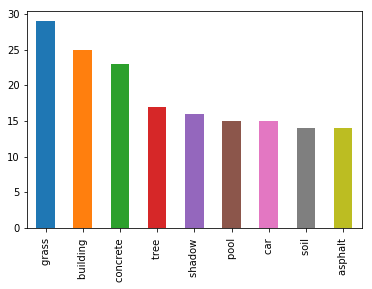

In [6]:
#Top labels in the train set
training_df['class'].value_counts().plot(kind = 'bar')

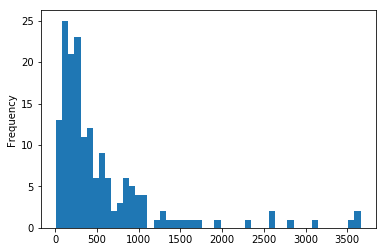

In [7]:
#Distribution of 1 feature - Area (across the train set)
training_df['Area'].plot(kind = 'hist', bins=50)

[]

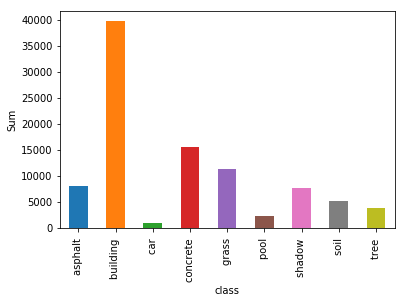

In [8]:
area_df = training_df.groupby('class').sum()['Area']
ax = area_df.plot.bar(x='class')
ax.set_ylabel('Sum')
ax.plot()

In [9]:
trainData = training_df.loc[:, training_df.columns != 'class']
trainData = preprocessing.scale(trainData)
testData = test_df.loc[:, test_df.columns != 'class']
testData = preprocessing.scale(testData)
trainLabel = training_df.loc[:,training_df.columns[0]]
trainLabel = training_df['class']
testLabel = test_df['class']

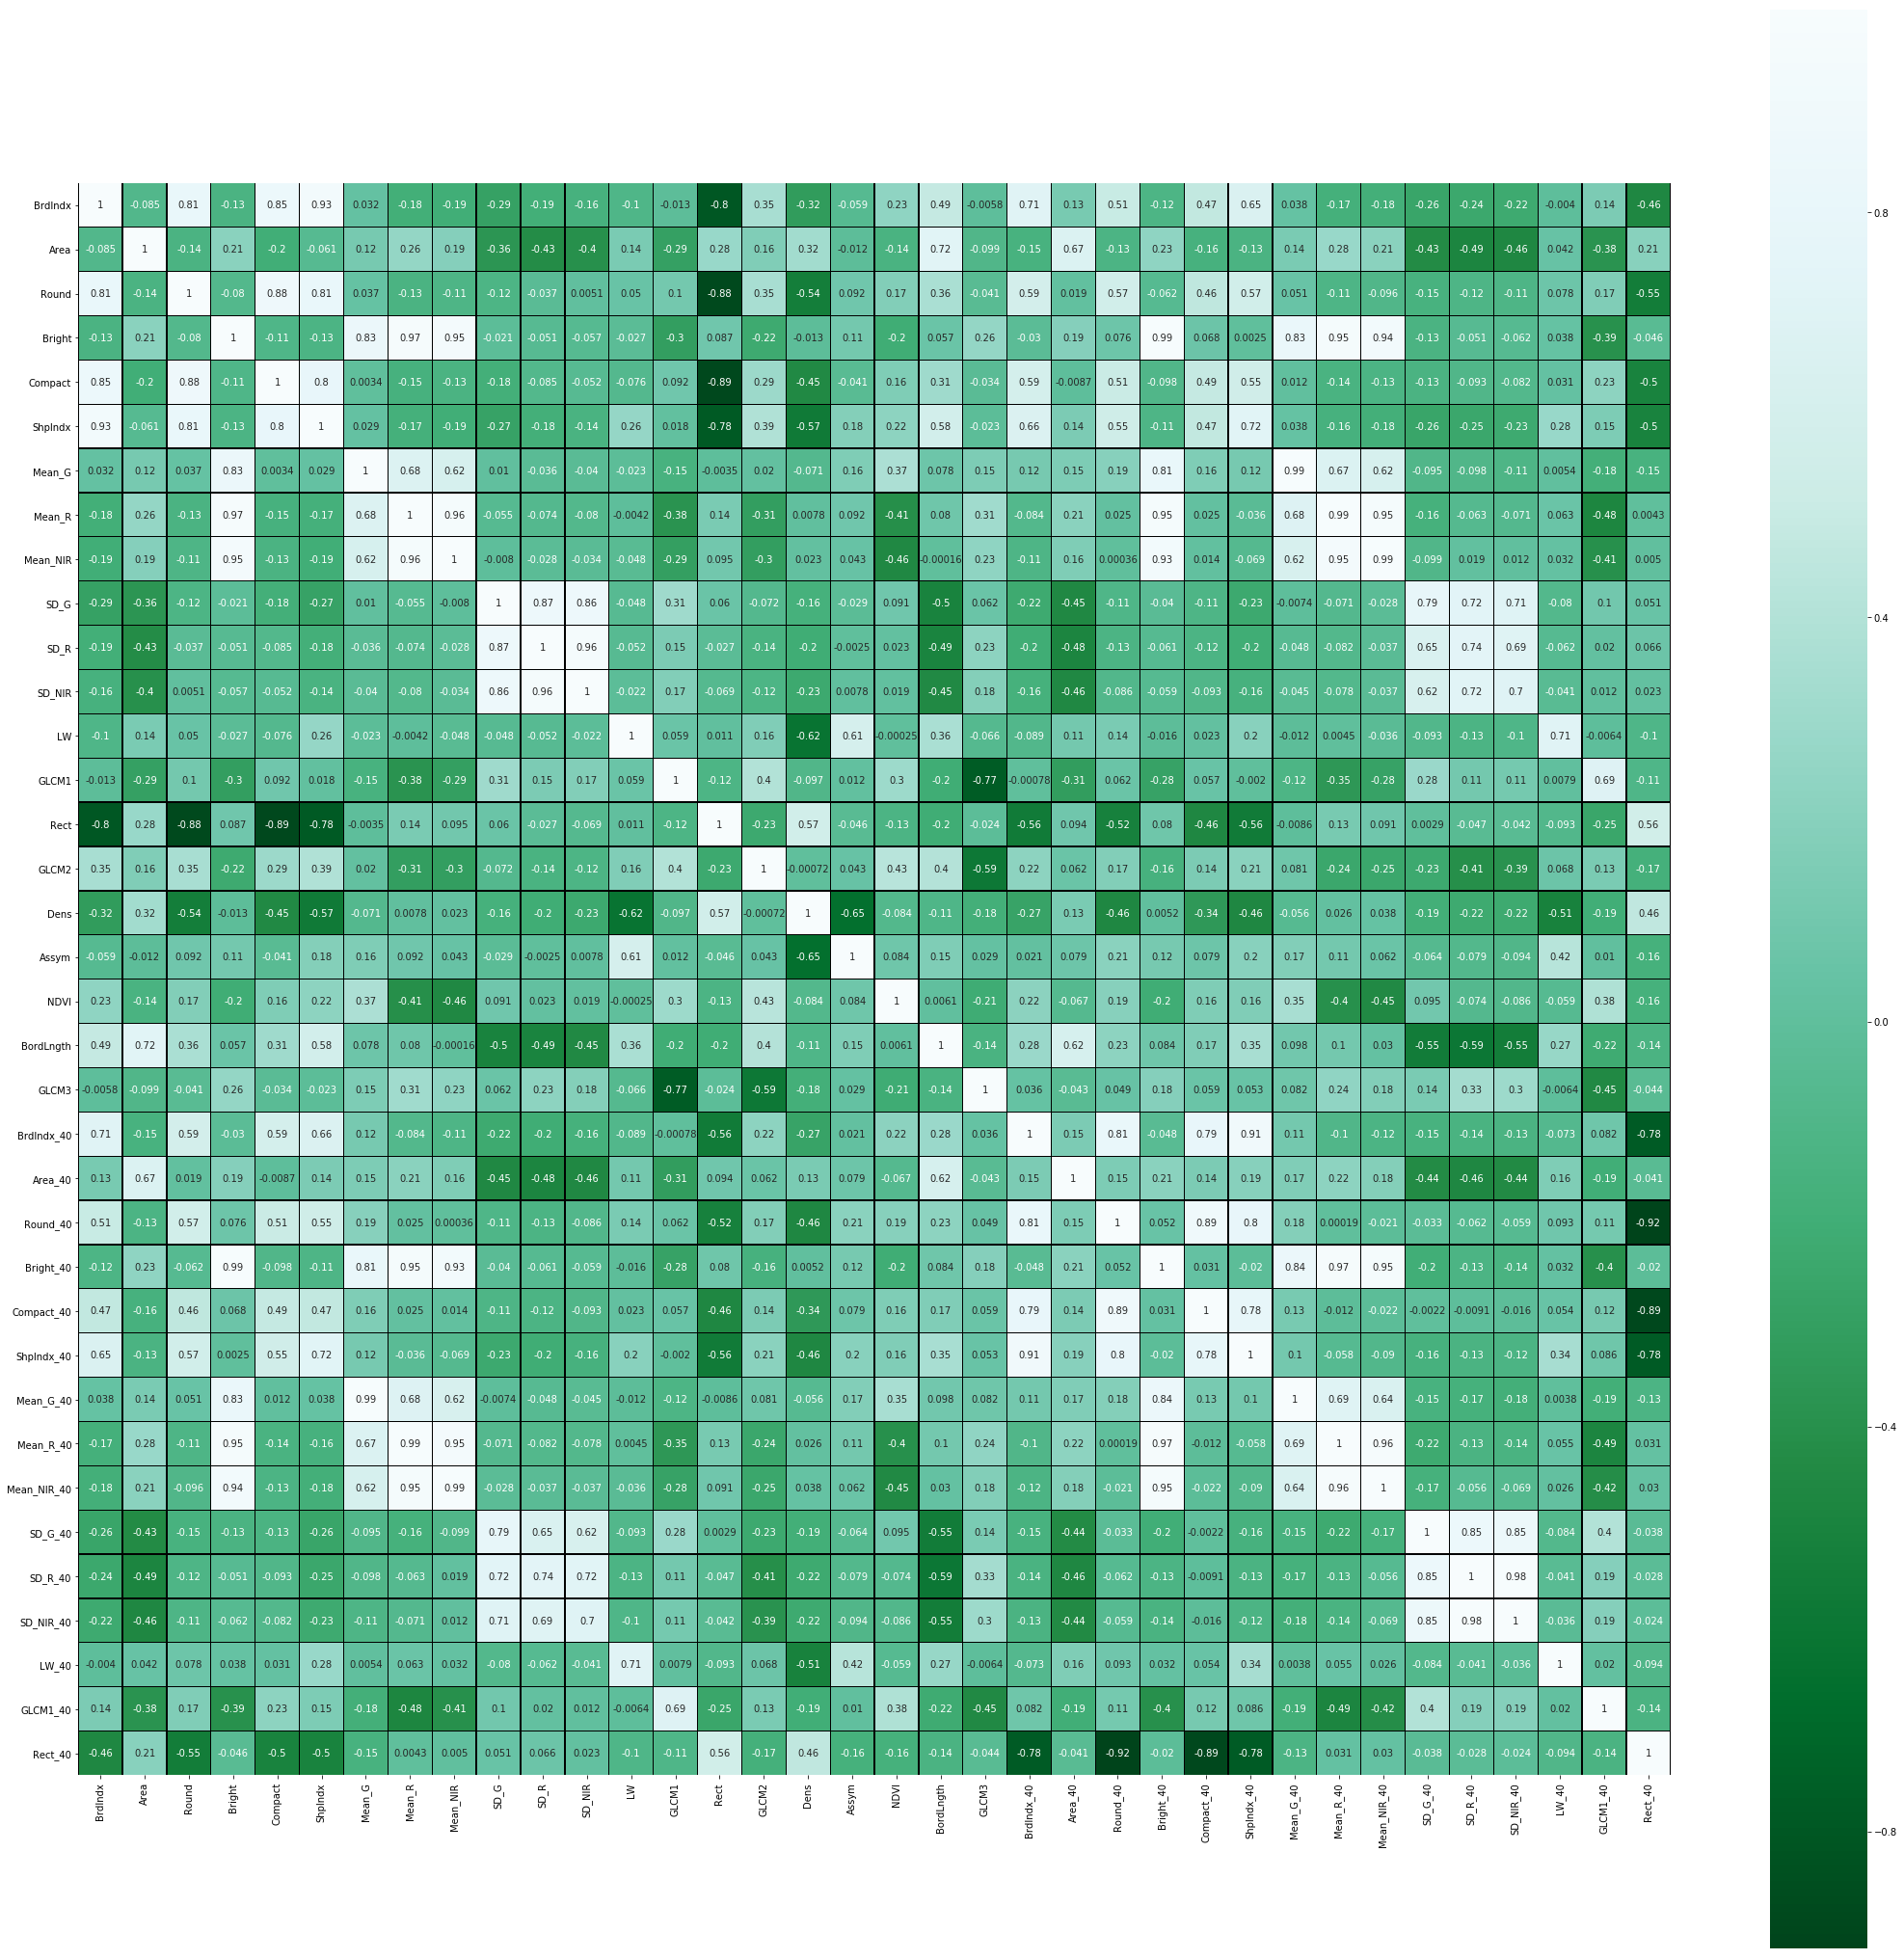

In [10]:
data=training_df.iloc[:,:37] 
cols=training_df.columns 
data_corr = data.corr()
plt.figure(figsize=(37,37))

sns.heatmap(data_corr, linewidths=0.25, vmax=1.0, square=True, cmap="BuGn_r", linecolor='k', annot=True)

In [11]:
testLabel.shape

(507,)

# Method 1

In [12]:
#Splitting the Training Data and working on it

In [13]:
#Splitting the training set into train and test 
train_x, test_x, train_y, test_y = train_test_split(trainData, trainLabel, test_size=0.30, random_state=42)

In [14]:
#Fit Random forest classifier
rft_train = RandomForestClassifier()
rft_train.fit(train_x, train_y)
prediction_train = rft_train.predict(test_x)
#Accuracy
accuracy_score(test_y, prediction_train)

0.84313725490196079

In [15]:
#Using the pre defined train and test set 

In [16]:
#Fit Random forest classifier
rft = RandomForestClassifier()
rft.fit(trainData, trainLabel)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
#fit SVM classifier 
clf = SVC(C = 1e5, kernel = 'linear')
clf.fit(trainData, trainLabel) 

SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
#Classifer models for prediction
models = []
models.append(('Random Forest classifier', rft))
models.append(('SVM', clf))
results = []
names = []
scoring = "accuracy"

In [19]:
warnings.filterwarnings('ignore')
#10-fold cross validation on the models
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, train_x, train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "Cross validation score of %s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Cross validation score of Random Forest classifier: 0.734091 (0.098686)
Cross validation score of SVM: 0.709091 (0.105801)


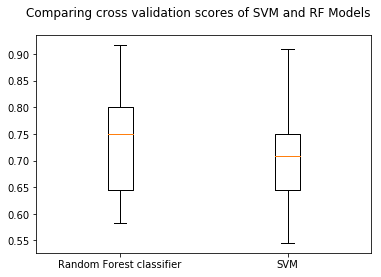

In [20]:
#plotting cross validated scores of Random forest classifier and SVM 
fig = plt.figure()
fig.suptitle('Comparing cross validation scores of SVM and RF Models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Testing Random forest classifier

In [21]:
#Prediction using random forest classifier
prediction_train_full = rft.predict(testData)

In [22]:
#Accuracy
accuracy_score(testLabel, prediction_train_full)

0.78106508875739644

In [23]:
#precision and recall using svm
precision_full = precision_score(testLabel, prediction_train_full, average="weighted")
recall_full = recall_score(testLabel, prediction_train_full, average="weighted")

print ("Precision:", precision_full) 
print ("Recall:", recall_full) 

Precision: 0.788924129909
Recall: 0.781065088757


# Testing SVM Classifier

In [24]:
#prediction using svm
prediction_svm = clf.predict(testData)

In [25]:
#accuracy using svm
accuracy_score(testLabel, prediction_svm)

0.73767258382642997

In [26]:
#precision and recall using svm
precision_svm = precision_score(testLabel, prediction_svm, average="weighted")
recall_svm = recall_score(testLabel, prediction_svm, average="weighted")

print ("Precision:", precision_svm) 
print ("Recall:", recall_svm) 

Precision: 0.747609213216
Recall: 0.737672583826


# Finding important features

Feature ranking:
1. feature 60 (0.045979)
2. feature 39 (0.032113)
3. feature 81 (0.028702)
4. feature 90 (0.028628)
5. feature 28 (0.028527)
6. feature 66 (0.027694)
7. feature 48 (0.027519)
8. feature 133 (0.025466)
9. feature 18 (0.025094)
10. feature 7 (0.023819)
11. feature 29 (0.022243)
12. feature 112 (0.021760)
13. feature 49 (0.021317)
14. feature 123 (0.020823)
15. feature 144 (0.020324)


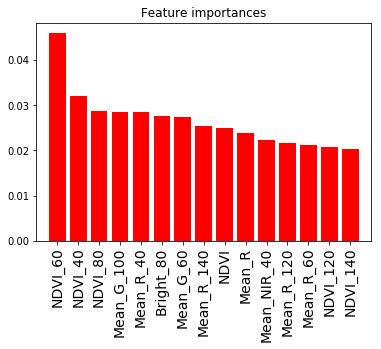

In [27]:
importances = rft.feature_importances_
feat_names = training_df.drop(['class'],axis=1).columns
indices = np.argsort(importances)[::-1]
top_k = 15
new_indices = indices[:top_k]
# Print the feature ranking
print("Feature ranking:")

for f in range(top_k):
    print("%d. feature %d (%f)" % (f + 1 , new_indices[f], importances[new_indices[f]]))
#Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(top_k), importances[new_indices],
       color="r", align="center")
plt.xticks(range(top_k), feat_names[new_indices], rotation='vertical',fontsize=14)
plt.xlim([-1, top_k])
plt.show()

# Method 2

In [28]:
# Feature Selection using Random Forest Classifier

In [29]:
# Creating a random forest classifier
rfc = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs=-1)

# Training the classifier
rfc.fit(trainData, trainLabel)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [30]:
# Printing the name and gini importance of each feature
for feature in zip(feat_names, rfc.feature_importances_):
    print(feature)

('BrdIndx', 0.0056568502228798272)
('Area', 0.013365057538321557)
('Round', 0.0034524846845430872)
('Bright', 0.0037635985954583184)
('Compact', 0.012401297447863028)
('ShpIndx', 0.0061286844492066091)
('Mean_G', 0.020629695609005797)
('Mean_R', 0.011512788347891233)
('Mean_NIR', 0.012831799524027167)
('SD_G', 0.005469261548385191)
('SD_R', 0.010006565150243719)
('SD_NIR', 0.0046517984432352345)
('LW', 0.00075635449938966535)
('GLCM1', 0.0037829191329621622)
('Rect', 0.0016076873525839781)
('GLCM2', 0.0010920300170839778)
('Dens', 0.00095745396960414842)
('Assym', 0.0030277127672730829)
('NDVI', 0.034152838519154807)
('BordLngth', 0.008241801078370305)
('GLCM3', 0.0012325632729716074)
('BrdIndx_40', 0.0046776220034096981)
('Area_40', 0.0047168464608488775)
('Round_40', 0.0029684369491582573)
('Bright_40', 0.0065841068974115922)
('Compact_40', 0.0048693734480821501)
('ShpIndx_40', 0.0041409674763374683)
('Mean_G_40', 0.015311304387960746)
('Mean_R_40', 0.016236990937644902)
('Mean_NIR_4

In [31]:
from sklearn.feature_selection import SelectFromModel

#We will select the features that will have importance of more than 0.010
sfm = SelectFromModel(rfc, threshold=0.010)

# Train the selector
sfm.fit(trainData, trainLabel)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.01)

In [32]:
# Print the names of the selected most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_names[feature_list_index])

Area
Compact
Mean_G
Mean_R
Mean_NIR
SD_R
NDVI
Mean_G_40
Mean_R_40
Mean_NIR_40
NDVI_40
Mean_G_60
Mean_R_60
Mean_NIR_60
NDVI_60
BordLngth_60
Bright_80
Mean_R_80
Mean_NIR_80
SD_G_80
NDVI_80
Bright_100
ShpIndx_100
Mean_G_100
Mean_R_100
SD_G_100
SD_R_100
NDVI_100
Bright_120
Mean_NIR_120
NDVI_120
BrdIndx_140
Bright_140
Mean_R_140
NDVI_140


In [33]:
#Let us Create new dataset with these most important features

# Transform the data to create a new dataset containing only the most important features

X_important_trainData = sfm.transform(trainData)
X_important_testData = sfm.transform(testData)

In [34]:
X_important_trainData.shape

(168, 35)

In [35]:
df_feat = pd.DataFrame(X_important_trainData, range(168),range(35))

In [36]:
#Creating new Random Forest Classifier

# Create a new random forest classifier for the most important features
rfc_important = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
rfc_important.fit(X_important_trainData, trainLabel)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [37]:
#cross validated score
scores_train = cross_val_score(rfc_important, X_important_trainData, trainLabel, cv=10)
print('Cross validation score:', scores_train.mean())

Cross validation score: 0.851691086691


In [38]:
#Comparing the accuracy, precision and recall

In [39]:
# Apply The new Classifier To The Test Data
y_important_predict = rfc_important.predict(X_important_testData)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(testLabel, y_important_predict)

0.76923076923076927

In [40]:
print(classification_report(testLabel, y_important_predict))

             precision    recall  f1-score   support

   asphalt        0.84      0.82      0.83        45
  building        0.73      0.82      0.77        97
       car        0.61      0.95      0.74        21
  concrete        0.81      0.67      0.73        93
     grass        0.71      0.81      0.76        83
      pool        0.87      0.93      0.90        14
    shadow        0.86      0.84      0.85        45
      soil        0.58      0.55      0.56        20
      tree        0.87      0.70      0.78        89

avg / total       0.78      0.77      0.77       507



In [41]:
cm = confusion_matrix(testLabel, y_important_predict)
cm

array([[37,  2,  1,  0,  0,  1,  4,  0,  0],
       [ 2, 80,  4, 11,  0,  0,  0,  0,  0],
       [ 0,  0, 20,  1,  0,  0,  0,  0,  0],
       [ 0, 25,  3, 62,  0,  0,  0,  2,  1],
       [ 0,  1,  2,  0, 67,  0,  0,  6,  7],
       [ 0,  0,  0,  0,  1, 13,  0,  0,  0],
       [ 4,  0,  1,  0,  0,  1, 38,  0,  1],
       [ 0,  2,  2,  3,  2,  0,  0, 11,  0],
       [ 1,  0,  0,  0, 24,  0,  2,  0, 62]])

In [42]:
y_important_predict = pd.Series(y_important_predict)

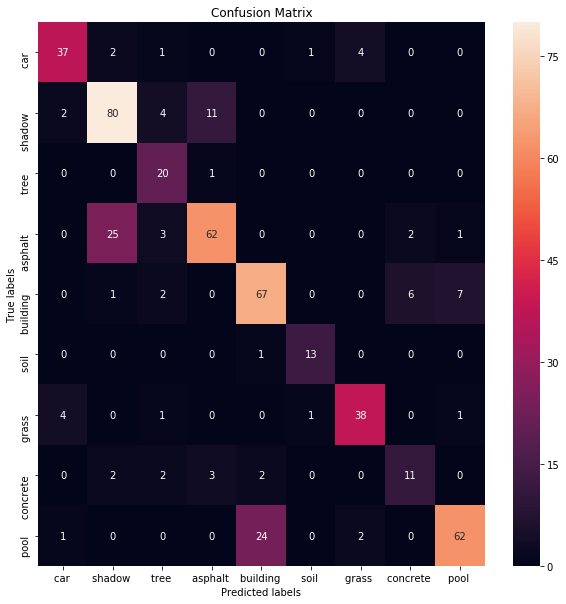

In [43]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(cm, annot=True, ax = ax, linecolor = 'k'); 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(y_important_predict.unique()); 
ax.yaxis.set_ticklabels(y_important_predict.unique());

In [44]:
X, y = X_important_trainData, trainLabel

# building a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: Accuracy : {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# using a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# running grid search
grid_search = GridSearchCV(clf, param_grid=param_grid,cv=5)
start = time()
grid_search.fit(X, y)
grid_search.predict(X_important_testData)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 20.33 seconds for 72 candidate parameter settings.
Model with rank: 1
Mean validation score: Accuracy : 0.869 (std: 0.077)
Parameters: {'bootstrap': True, 'max_features': 10, 'max_depth': None, 'min_samples_split': 3, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: Accuracy : 0.863 (std: 0.073)
Parameters: {'bootstrap': True, 'max_features': 3, 'max_depth': None, 'min_samples_split': 3, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: Accuracy : 0.863 (std: 0.090)
Parameters: {'bootstrap': False, 'max_features': 1, 'max_depth': None, 'min_samples_split': 10, 'criterion': 'gini'}



In [45]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_split,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.037968,0.002363,0.750000,0.865718,True,gini,3,1,2,"{'bootstrap': True, 'max_features': 1, 'max_de...",...,0.735294,0.888060,0.696970,0.903704,0.766667,0.884058,0.001346,0.000159,0.030113,0.033188
1,0.039021,0.002753,0.767857,0.882430,True,gini,3,1,3,"{'bootstrap': True, 'max_features': 1, 'max_de...",...,0.823529,0.888060,0.696970,0.859259,0.800000,0.891304,0.003084,0.000748,0.043241,0.012744
2,0.045398,0.002853,0.785714,0.876260,True,gini,3,1,10,"{'bootstrap': True, 'max_features': 1, 'max_de...",...,0.794118,0.843284,0.696970,0.903704,0.800000,0.898551,0.008783,0.000708,0.046110,0.023483
3,0.041542,0.002426,0.791667,0.913490,True,gini,3,3,2,"{'bootstrap': True, 'max_features': 3, 'max_de...",...,0.764706,0.932836,0.696970,0.940741,0.833333,0.920290,0.002996,0.000298,0.057153,0.022756
4,0.048580,0.003180,0.750000,0.907836,True,gini,3,3,3,"{'bootstrap': True, 'max_features': 3, 'max_de...",...,0.705882,0.902985,0.696970,0.925926,0.733333,0.884058,0.007808,0.000943,0.046670,0.021919
5,0.039872,0.002435,0.791667,0.886923,True,gini,3,3,10,"{'bootstrap': True, 'max_features': 3, 'max_de...",...,0.735294,0.873134,0.757576,0.955556,0.766667,0.855072,0.002981,0.000248,0.047960,0.035937
6,0.051420,0.002454,0.785714,0.901723,True,gini,3,10,2,"{'bootstrap': True, 'max_features': 10, 'max_d...",...,0.823529,0.865672,0.636364,0.962963,0.800000,0.891304,0.009275,0.000255,0.083850,0.032459
7,0.053812,0.003125,0.797619,0.906444,True,gini,3,10,3,"{'bootstrap': True, 'max_features': 10, 'max_d...",...,0.823529,0.888060,0.727273,0.933333,0.733333,0.876812,0.007442,0.000465,0.070892,0.021293
8,0.053658,0.003058,0.767857,0.892963,True,gini,3,10,10,"{'bootstrap': True, 'max_features': 10, 'max_d...",...,0.764706,0.880597,0.757576,0.940741,0.700000,0.862319,0.007806,0.000481,0.036943,0.026110
9,0.038934,0.002356,0.815476,1.000000,True,gini,None,1,2,"{'bootstrap': True, 'max_features': 1, 'max_de...",...,0.735294,1.000000,0.727273,1.000000,0.833333,1.000000,0.002119,0.000140,0.073771,0.000000
